<a href="https://colab.research.google.com/github/sophiascarano/hybrid_quantum_classical_KiUNet/blob/main/messy_drafts/quantum_test_pennylane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PennyLane

In [ ]:
!pip install pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
#Devices are loaded in PennyLane via the function device()
#Here, as we only require a single qubit for this example, we set wires=1.
dev1 = qml.device("default.qubit", wires=1)

### Constructing the QNode

- QNodes are an abstract encapsulation of a quantum function, described by a quantum circuit. QNodes are bound to a particular quantum device, which is used to evaluate expectation and variance values of this circuit.
- QNodes can be constructed via the QNode class, or by using the provided qnode() decorator.

In [ ]:
#First, we need to define the quantum function that will be evaluated in the QNode:
def circuit(params):
    qml.RX(params[0], wires=0) #which wire (or list of wires) is it acting on
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0)) 
    #must return a CLASSICAL quantity: single or tuple of measured observables

Once we have written the quantum function, we convert it into a QNode running on device dev1 by applying the qnode() decorator. directly above the function definition:

In [ ]:
@qml.qnode(dev1)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0))

Thus, our `circuit()` quantum function is now a `QNode`, which will run on device `dev1` every time it is evaluated.

In [ ]:
print(circuit([0.54, 0.12]))
#passing in parameters phi = .54 for the RX gate, and phi = .12 for the RY gate

0.8515405859048368


# Calculating Quantum Gradients

- The gradient of the function `circuit`, encapsulated within the `QNode`, can be evaluated by utilizing the same quantum device (`dev1`) that we used to evaluate the function itself.
- We can differentiate by using the built-in grad() function. This returns another function, representing the gradient (i.e., the vector of partial derivatives) of circuit. The gradient can be evaluated in the same way as the original function:
- The function `grad()` itself **returns a function**, representing the derivative of the `QNode` with respect to the argument specified in `argnum`. In this case, the function `circuit` takes one argument (`params`), so we specify `argnum=0`. Because the argument has two elements, the returned gradient is two-dimensional. We can then evaluate this gradient function at any point in the parameter space.

In [ ]:
dcircuit = qml.grad(circuit, argnum=0) 
#argnum=0 so look at the first (index from zero) arg passed to circuit (which is "params")

In [ ]:
print(dcircuit([0.54, 0.12]))

[array(-0.51043865), array(-0.1026782)]


So looking at it a different way:
- Same as above, but pass the parameters separately instead of a list "params"

In [ ]:
@qml.qnode(dev1)
def circuit2(phi1, phi2):
  qml.RX(phi1, wires=0)
  qml.RY(phi2, wires=0)
  return qml.expval(qml.PauliZ(0))

In [ ]:
dcircuit2 = qml.grad(circuit2, argnum=[0,1])
print(dcircuit2(0.54, 0.12))

(array(-0.51043865), array(-0.1026782))


# great. arrays again - try in torch later



# QISKIT

In [ ]:
!pip install qiskit

     |████████████████████████████████| 6.0MB 5.7MB/s 
     |████████████████████████████████| 18.0MB 280kB/s 
     |████████████████████████████████| 235kB 43.4MB/s 
     |████████████████████████████████| 215kB 42.6MB/s 
     |████████████████████████████████| 2.1MB 23.3MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 1.0MB 25.7MB/s 
     |████████████████████████████████| 194kB 45.2MB/s 
     |████████████████████████████████| 112kB 37.1MB/s 
     |████████████████████████████████| 614kB 32.8MB/s 
     |████████████████████████████████| 3.2MB 30.9MB/s 
     |████████████████████████████████| 6.3MB 29.4MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.0-cp37-none-any.whl size=10489 sha256=e99d581e5e45984f284b92b4d863c86116a3cd4952e29ae9e7ff67d380f70f54
  Stored in directory: /root/.cache/pip/wheels/77/b5/a2/e88ddacf664ca9d2d30275664482d128c3e28b1fd554124a9d
  Created wheel for python-constraint: filename=python_constraint-1.4.0-

In [ ]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-2wcz8hg0
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-2wcz8hg0
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-cp37-none-any.whl size=16953 sha256=8cdfb705f0ce52ef6dcfe82391be2bd5afa455f068a009a829b4b743bc685394
  Stored in directory: /tmp/pip-ephem-wheel-cache-ehx93jq1/wheels/0c/57/26/1c12886a219af04a38ca1e674fdeeff40b8a5963326ba3c71a
Successfully built qiskit-textbook


In [ ]:
import qiskit
#qiskit.__version__
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

from math import sqrt, pi, cos, sin

from sklearn.metrics import recall_score, precision_score, confusion_matrix

In [ ]:
from qiskit import QuantumCircuit

#Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

#Define initial state as |1>
initial_state = [0,1]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

In [ ]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Do the simulation, returning the result
result = execute(qc,backend).result()

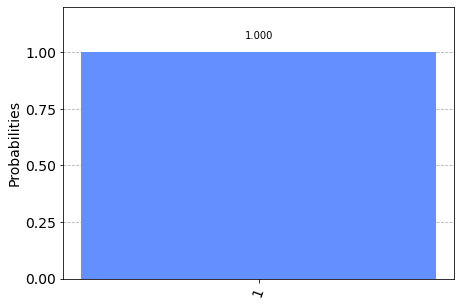

In [ ]:
# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

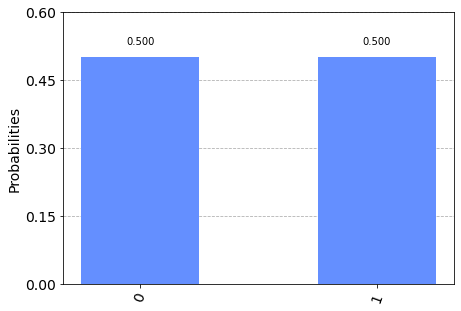

In [ ]:
# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)

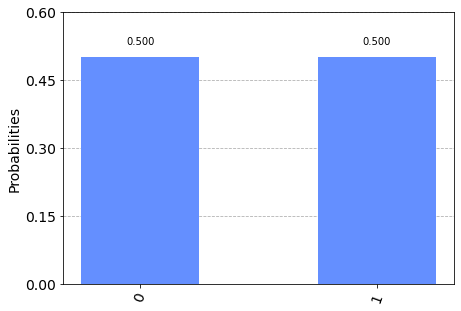

In [ ]:
def get_state (theta):
  """returns a valid state vector"""
  
  return [cos(theta/2), sin(theta/2)]

# play with the values for theta to get a feeling
theta = -1*pi/2 # affects the probabilities

# create, initialize, and execute the quantum circuit
qc = QuantumCircuit(1)
qc.initialize(get_state(theta), 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

In [ ]:
qc.draw(output='text')

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711,-0.70711) ├
     └──────────────────────────────┘

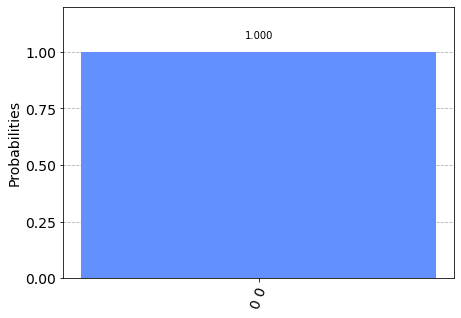

In [ ]:
#observe the qubit
qc.measure_all()

#Do the simulation, returning the result
result = execute(qc, backend).result()
counts =result.get_counts()
plot_histogram(counts)

#once you collapse it, it's in a 100% probability of either state 1 or 0

In [ ]:
qc.draw(output='text')


┌──────────────────────────────┐ ░ ┌─┐ ░ ┌─┐
    q_0: ┤ initialize(0.70711,-0.70711) ├─░─┤M├─░─┤M├
         └──────────────────────────────┘ ░ └╥┘ ░ └╥┘
 meas: 1/════════════════════════════════════╩═════╬═
                                             0     ║ 
                                                   ║ 
meas0: 1/══════════════════════════════════════════╩═
                                                   0

#PQC

random classifier for titanic data

In [ ]:
def pqc_classify(backend, passenger_state):
  """backend −− a qiskit backend to run the quantum circuit at
  passenger_state −− a valid quantum state vector"""

  # Create a quantum circuit with one qubit
  qc = QuantumCircuit(1)

  # Define state |Psi> and initialize the circuit
  qc.initialize(passenger_state, 0)

  # Measure the qubit
  qc.measure_all()

  # run the quantum circuit
  result=execute(qc,backend).result()

  # get the counts, these are either {'0': 1} or {'1': 1}
  counts=result.get_counts(qc)

  #getthebit0or1
  return int(list(map(lambda item: item[0], counts.items()))[0])